# States and measurements

## Qubit

Qubits are vectors in $\mathbb C^2$ and so they are defined by two complex numbers. One degree of freedom is removed because we do not care about complex unit prefactor of the vector and another is removed because we want our states to be normalized, $\langle\psi|\psi\rangle=1$. We will now look at different ways of looking at states in *Qiskit*.

In [117]:
import qiskit
import random
import math
from qiskit.visualization import plot_histogram, plot_state_city, plot_state_paulivec, plot_bloch_vector
from qiskit.visualization import plot_state_hinton, plot_state_qsphere, plot_bloch_multivector
%matplotlib inline

Let us start with a simple circuit having one qubit and no classical register.

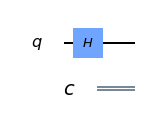

In [101]:
circ = qiskit.QuantumCircuit(1, 1)
circ.h(0)
circ.draw(output="mpl")

We can define measurement separately.

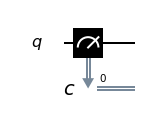

In [102]:
measure_z = qiskit.QuantumCircuit(1, 1)
measure_z.measure(0, 0)
measure_z.draw(output="mpl")

The basic circuit can now be composed with the measurement into larger circuit.

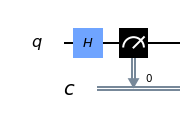

In [103]:
circZ = circ + measure_z
circZ.draw(output="mpl")

We have seen this circuit previously and we know what we will measure.

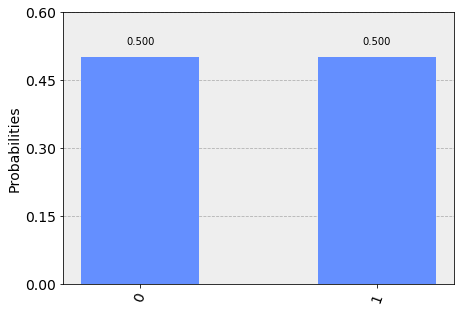

In [104]:
backend = qiskit.Aer.get_backend("qasm_simulator")
job = qiskit.execute(circZ, backend, shots=1024)
plot_histogram(job.result().get_counts())

Previous simulation performed 1024 experimental runs on given circuit, which is something that a real experiment (and real quantum computer) would give us. But this information is not complete - single measurement gives us only partial information and only in a statistical form. What we find are the probabilities of obtaining given outcomes. In previous case in <code>circ</code> we prepared the $|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ state. But the measurements measures in $\{|0\rangle,|1\rangle\}$ basis. The probabilities are given by the *Born rule:* having a state $|\psi\rangle$, the probability of measuring it in state $|\phi\rangle$ is $p(\phi | \psi)=\|\langle\phi | \psi\rangle\|$. In this case we find $p(0 | +)=p(1| +)=1/2$.

Previous description via simulation does offer a good way of comparing with experiments, but we can gat full information about the state (before measurement) by invoking the <code>statevector_simulator</code> backend.

In [105]:
backend = qiskit.Aer.get_backend('statevector_simulator')
job = qiskit.execute(circ, backend)
result = job.result()
psi  = result.get_statevector(circ)

The output state (before measurement) is now stored in <code>psi</code> and we can visualise it in several different ways. For now we will use Bloch vector representation - each state can be represented as a vector on a sphere (vis. two free parameters described at the beginning).

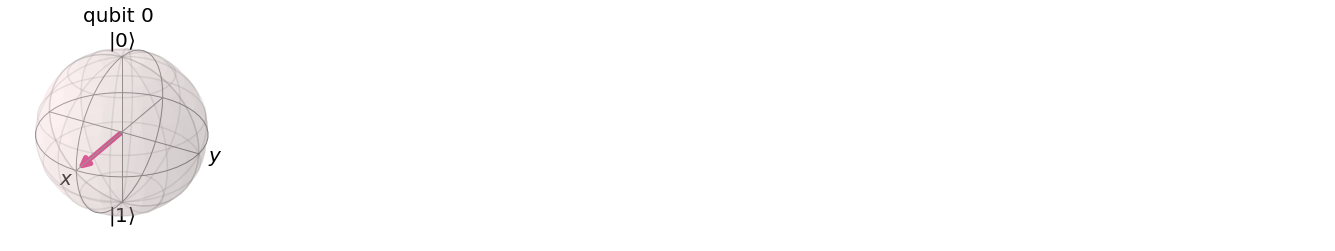

In [106]:
plot_bloch_multivector(psi)

Other forms include functions <code>plot_state_paulivec(psi)</code>, <code>plot_state_hinton(psi)</code>, <code>plot_state_city(psi)</code> and others. Some of these also have interactive versions, for example:

In [98]:
from qiskit.visualization import iplot_state_city

In [ ]:
iplot_state_city(psi)

## Random state

Sometimes it is useful to be able to prepare a random state. States $|0\rangle$, $|1\rangle$, $|+\rangle$ or $|-\rangle$ are just some possibilities. Since the initial state is always $|0\rangle$ to get other states, just like above, we need to transform them. We saw that we could use $H$ to get the $|+\rangle$ state. We can use $\sigma_x$ that acts as NOT, etc. Useful is a set of unitary rotations of qubits.

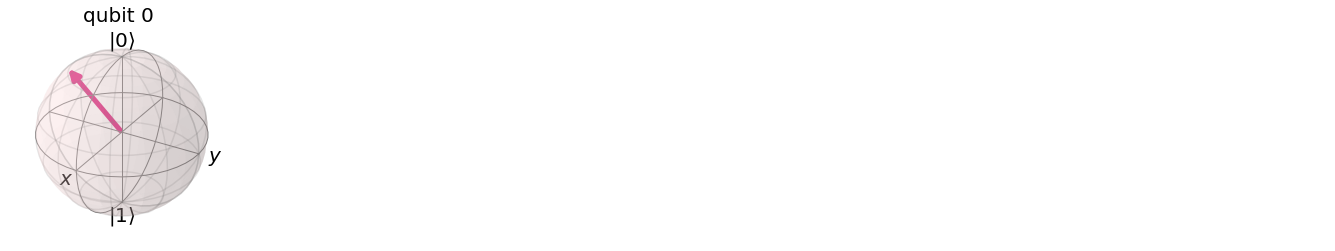

In [111]:
rotx = qiskit.QuantumCircuit(1)
rotx.rx(0.823, 0)
job = qiskit.execute(rotx, backend)
result = job.result()
plot_bloch_multivector(result.get_statevector(rotx))

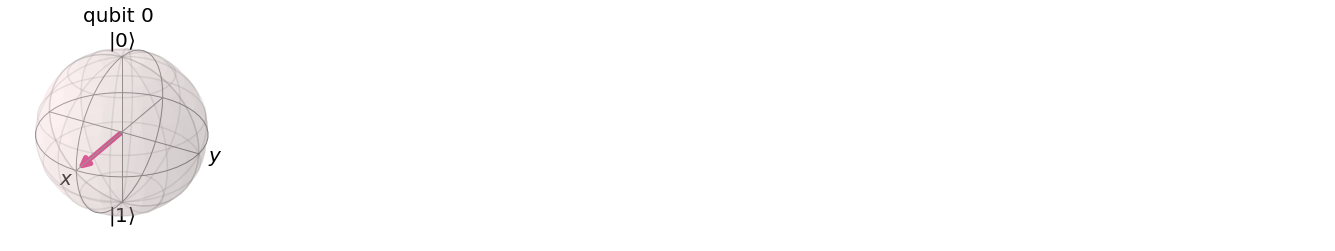

In [115]:
roty = qiskit.QuantumCircuit(1)
roty.ry(math.pi / 2, 0)
job = qiskit.execute(roty, backend)
result = job.result()
plot_bloch_multivector(result.get_statevector(roty))

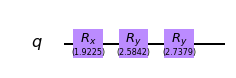

In [121]:
rnd_circ = qiskit.QuantumCircuit(1)
rnd_circ.rx(math.pi * random.random(), 0)
rnd_circ.ry(math.pi * random.random(), 0)
rnd_circ.ry(math.pi * random.random(), 0)
rnd_circ.draw(output="mpl")